# Unsupervised Machine Learning Algorithm

## Steps of Preprocessing of data

Step 1] - Import necessary libararies . Step 2] - Import Data Set . Step 3] - Sanity Check of Data Step 4] - Exploratory Data Analysis [EDA] Step 5] - Missing Value Treatments Step 6] - Outliers Treatments. Step 7] - Duplicates and Garbage Value treatment. Step 8] - Encoding of Data

### In this assignment , iris dataset available in sklearn library is used.

# Step 1: Import Necessary Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import warnings as wr
wr.filterwarnings("ignore")

## Step 2 : Import Dataset

Drop the target (species) since we are working with unsupervised learning (clustering).This focuses on feature clustering only.The Iris dataset in sklearn does not have the target column in the main DataFrame.Therefore, no need to drop any column here; we can proceed with the clustering

In [3]:
iris =load_iris ()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# Create a DataFrame from the dataset's data (features)
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Print the first few rows to understand the structure of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nFeature names:")
print(iris.feature_names)
print("\nTarget names:")
print(iris.target_names)


Dataset shape: (150, 4)

Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names:
['setosa' 'versicolor' 'virginica']


In [6]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

# Step 3: Sanity Check of Data

In [7]:
df.shape

(150, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
df1=df.isnull().sum()
df1

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [10]:
df1/df.shape[0]*100

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

From the above, it is understood that there is no null values. Thus, no need to treat null values.

In [11]:
df.duplicated().sum()

1

In [12]:
#there is a duplicate value ,duplicate values must be removed.
df.drop_duplicates(inplace=True) # drop duplicates and update df
df.duplicated().sum() # show duplicate count

0

In [13]:
#Identifying Garbage Value in object column
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*15)

No garbage values and object values

# Step 4- Exploratory Data Analysis

In [14]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


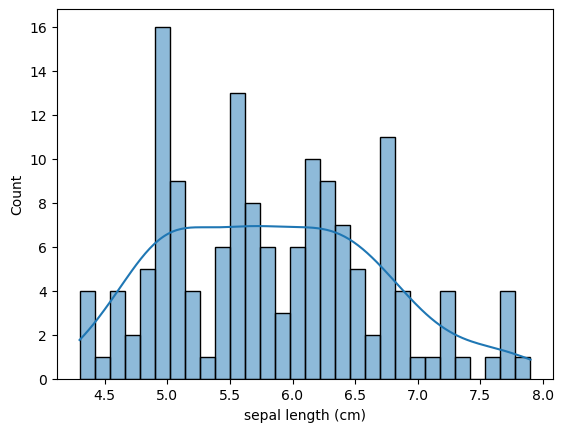

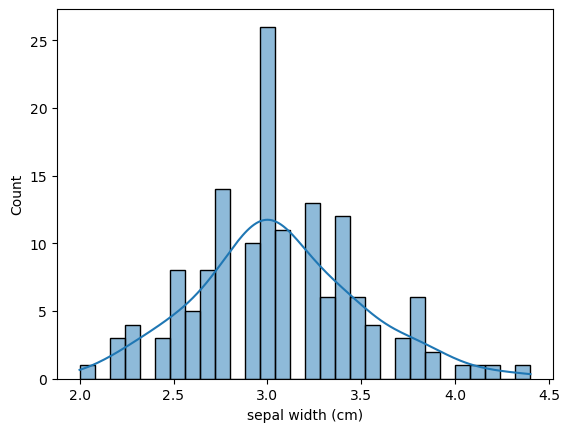

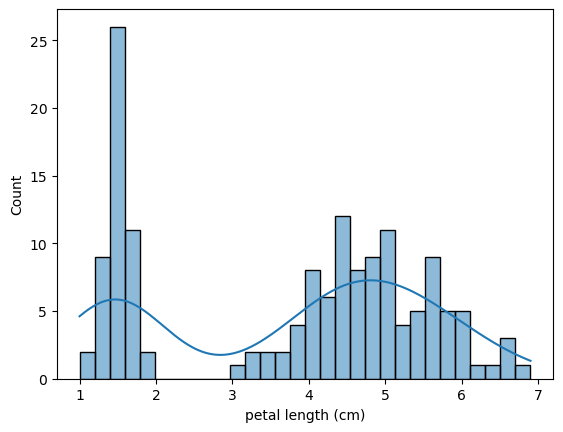

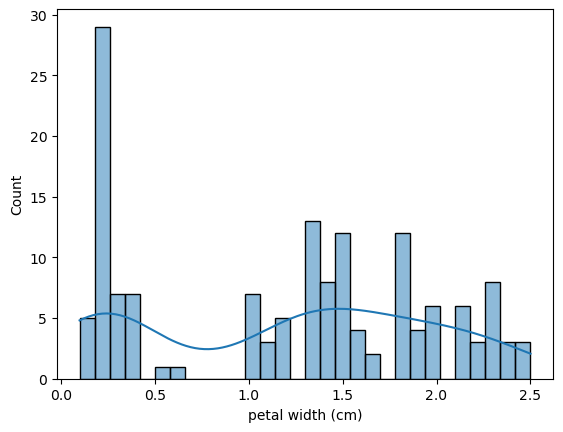

In [15]:
#Histogram to understand the distribution 
import warnings as wr
wr.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i,bins=30,kde='True')
  plt.show()

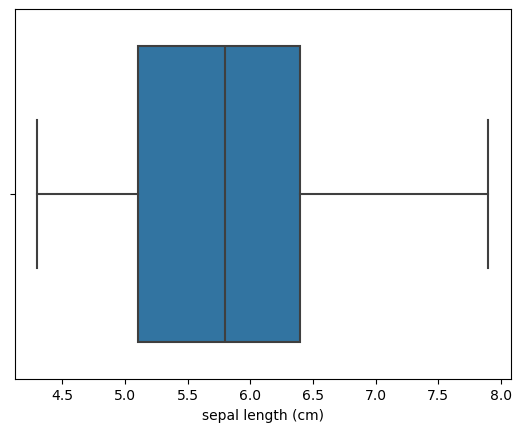

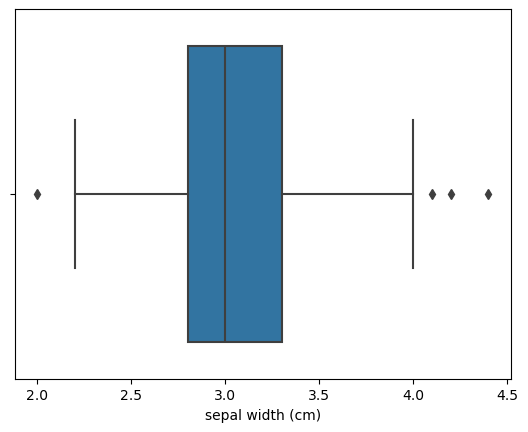

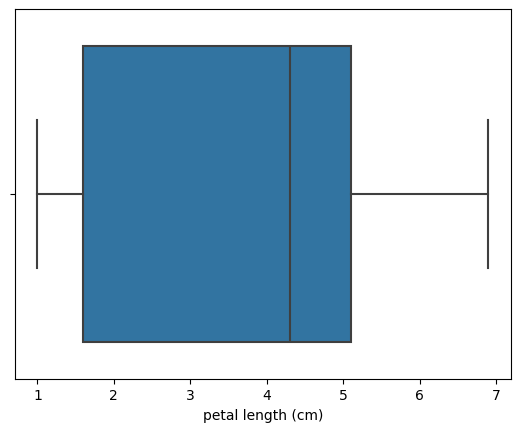

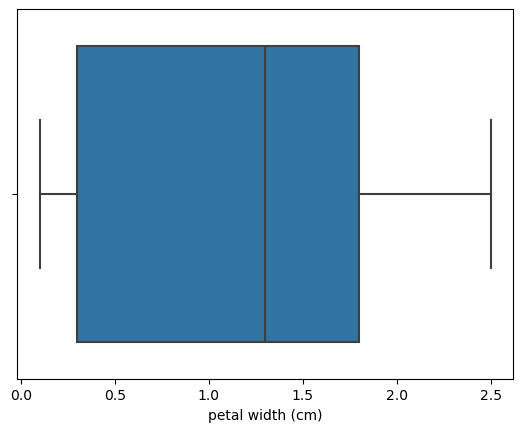

In [16]:
#Boxplot to understand the ouliers 
import warnings as wr
wr.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

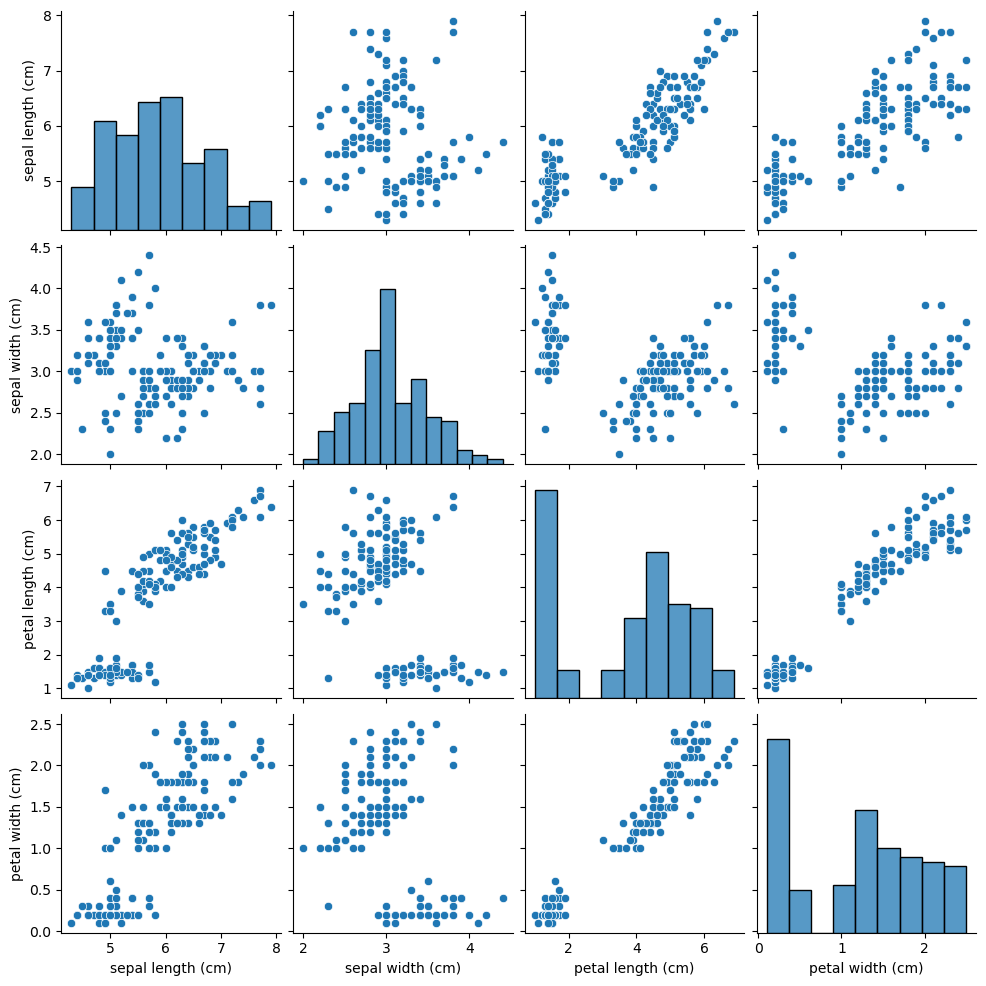

In [17]:
# Draw scatter plot for every feature
sns.pairplot(df)
plt.show()

In [18]:
df.select_dtypes(include="number").columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [19]:
#Correlation with heat map to interpret the relation
s=df.select_dtypes(include='number').corr()
s

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.118129,0.873738,0.820620
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894
petal length (cm),0.873738,-0.426028,1.000000,0.962772
petal width (cm),0.820620,-0.362894,0.962772,1.000000


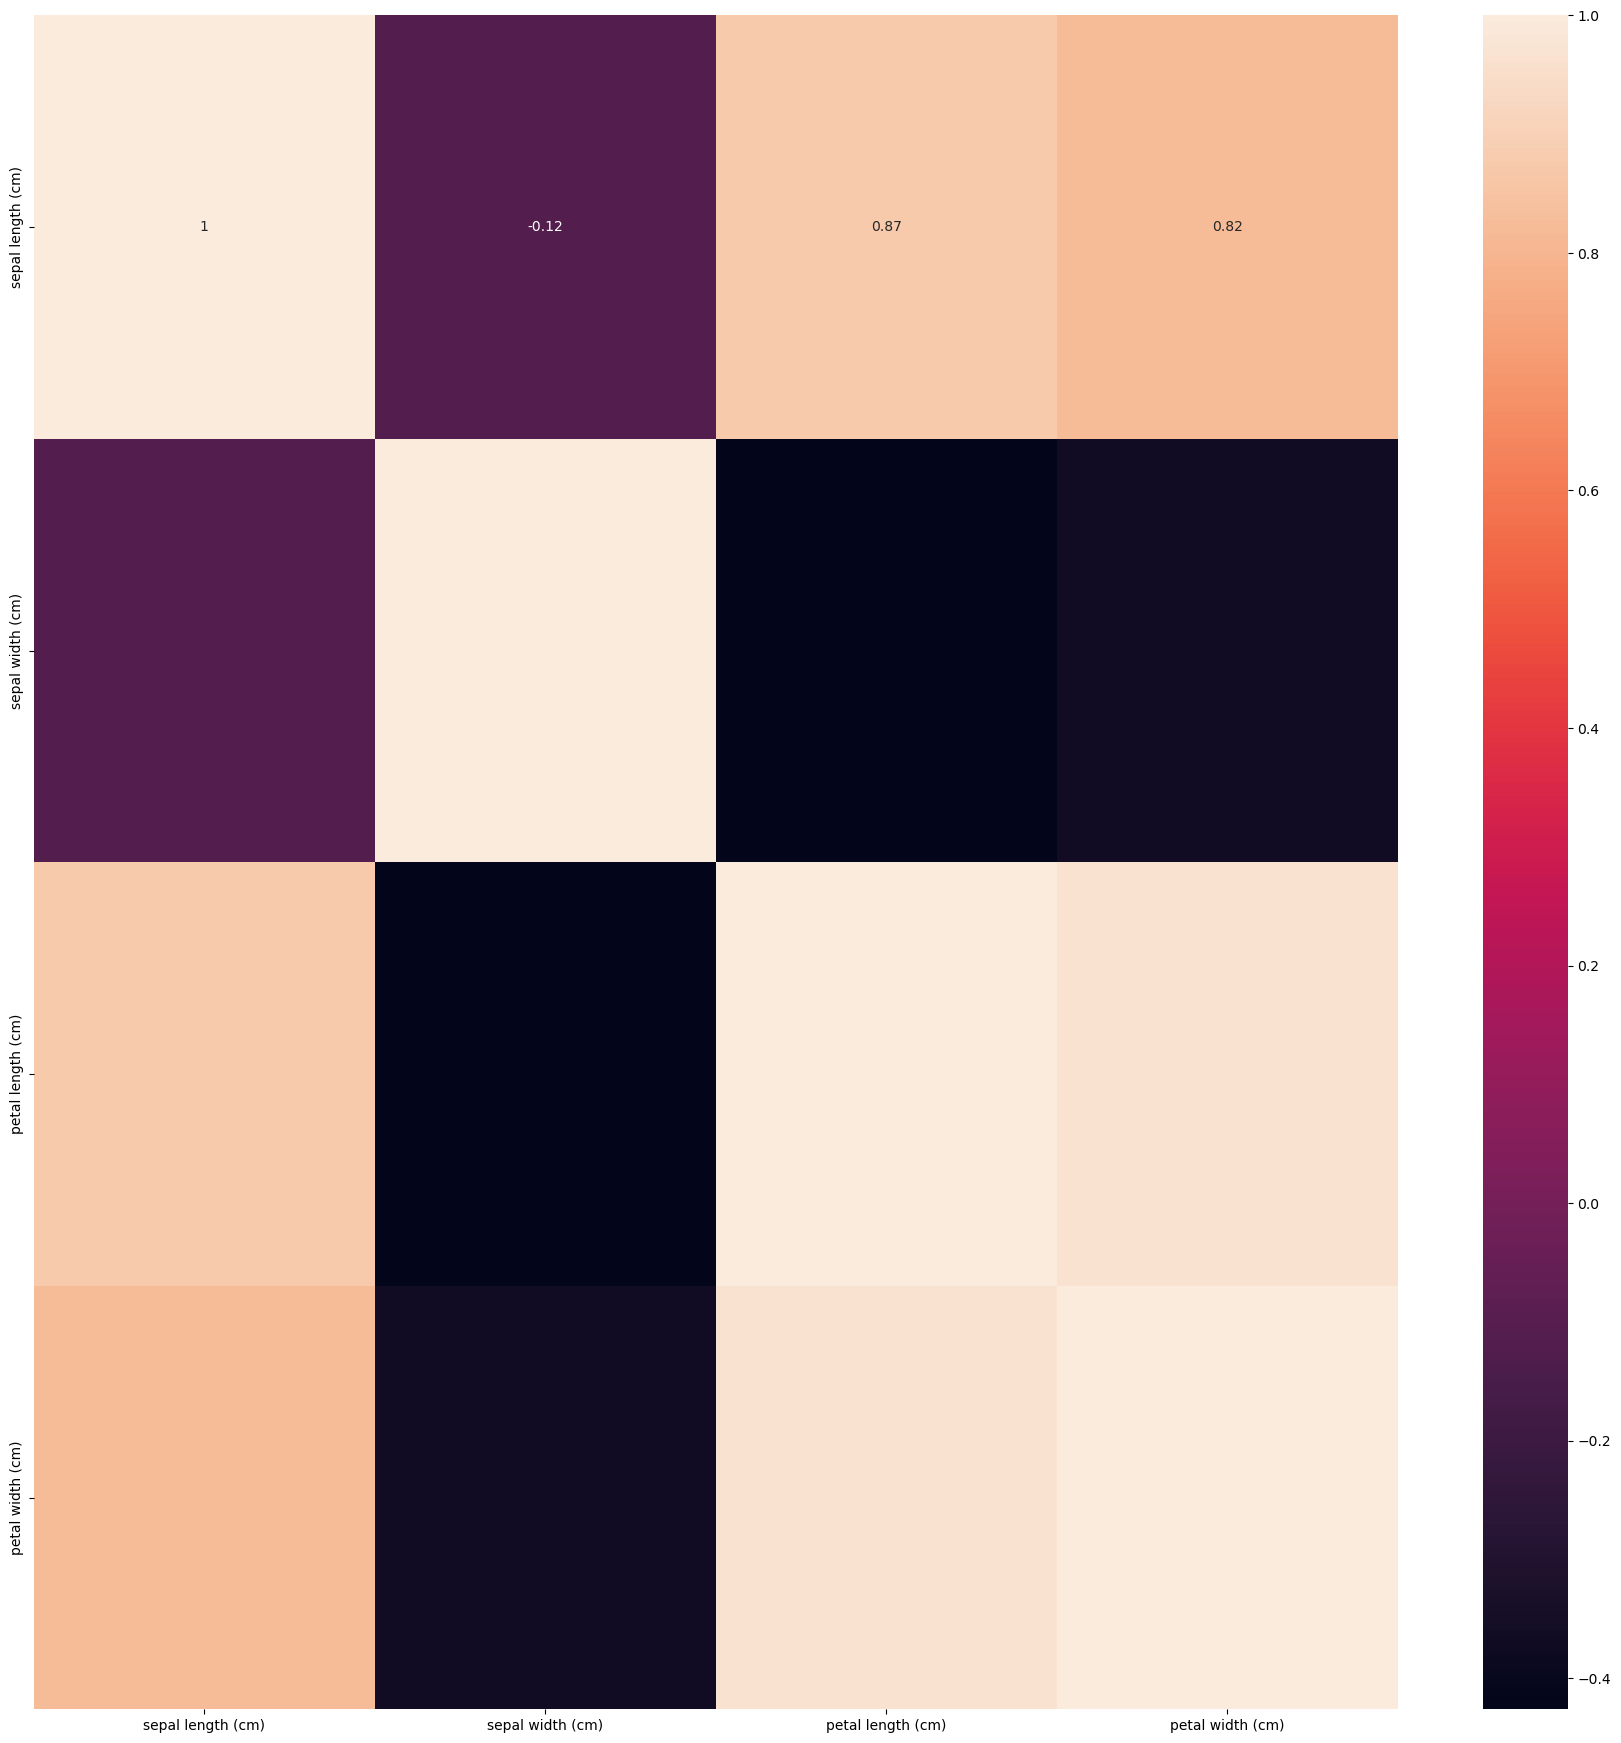

In [20]:
plt.figure(figsize=(22, 22))
sns.heatmap(s,annot=True)
plt.show()

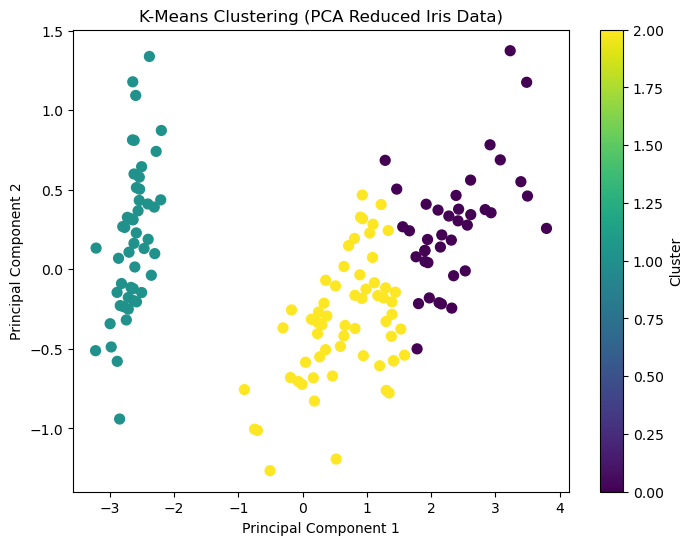

In [21]:
#Scatter Plot of Clusters (K-Means with PCA)
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Apply PCA to reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)

# Apply KMeans clustering (3 clusters, since Iris has 3 species)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('K-Means Clustering (PCA Reduced Iris Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


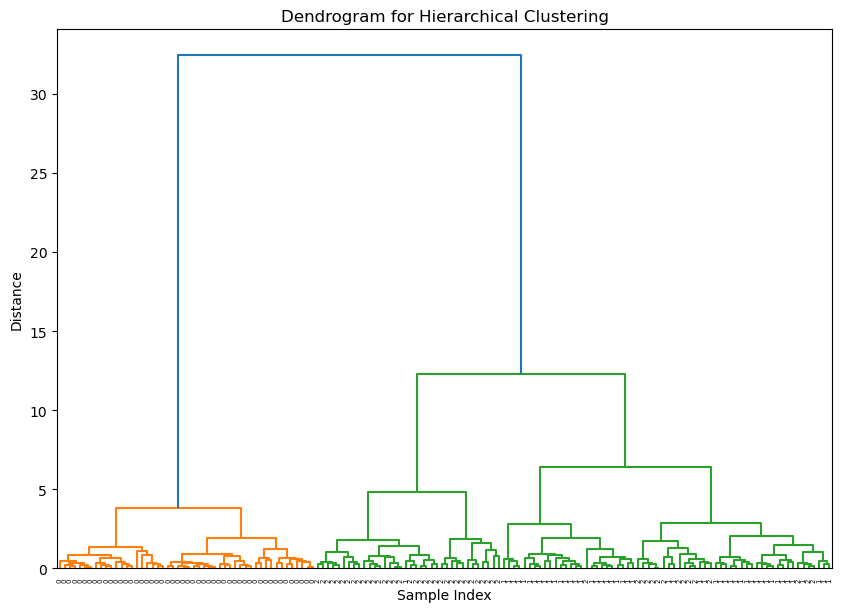

In [22]:
# Dendrogram for Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering on the data
linked = linkage(iris.data, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=iris.target)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Step:5 -  Missing Value Treatments

No Missing value in datas.So no need of impuations in this dataset

# Step : 6- Outliers treatment


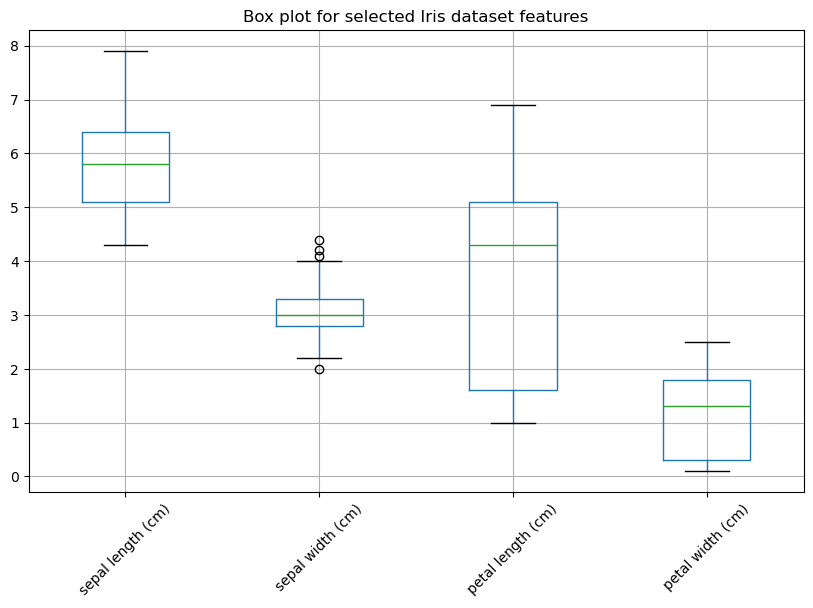

In [23]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', ]
plt.figure(figsize=(10, 6))
df.boxplot(column=features)
plt.title('Box plot for selected Iris dataset features')
plt.xticks(rotation=45)
plt.show()

In [24]:
# Function to get outliers using IQR method and filter out outliers or trim
def get_IQR_outliers(df, column, filter=False):
    if column not in df.columns:               # Check if the column exists in the DataFrame
        raise ValueError(f"Column '{column}' is not in DataFrame and the DataFrame columns are :{df.columns}")

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_mask =  (df[column] < lower_bound) | (df[column] > upper_bound)
    if filter:                    # if the filter is true
        return df[~outliers_mask] # return outlier filtered dataframe
    else:                         # if the filter is false
        return df[outliers_mask]  # return dataframe of outliers

In [25]:
# Function to get outliers using Zscore method and filter out outliers or trim
def get_zscore_outliers(df, column, threshold=3, filter=False):
    if column not in df.columns:               # Check if the column exists in the DataFrame
        raise ValueError(f"Column '{column}' is not in DataFrame and the DataFrame columns are :{df.columns}")

    x = df[column]                             # Extract the specified column from the DataFrame
    mean = x.mean()                            # Calculate the mean of the column
    standard_deviation = x.std()               # Calculate the standard deviation of the column
    z_scores = (x - mean) / standard_deviation # Calculate Z-scores for each value in the column
    outliers_mask = ((z_scores < -1* threshold) | (z_scores > threshold))
    if filter:                                 # if filter is True
        return df[~outliers_mask]              # return outlier filtered dataframe
    else:                                      # if filter is false
        return df[outliers_mask]               # return outlier dataframe

Trim outliers with IQR method on columns 'sepal width(cm)'

In [26]:
tdf = df.copy()
columns = ['sepal width (cm)'] # 'mean area', 'worst area', 'mean concavity', 'worst concavity', 'mean radius', 'worst radius'
for column in columns:
    print(f"Outliers in {column} : {len(get_IQR_outliers(df=tdf, column=column, filter=False))}")
    tdf = get_IQR_outliers(df=tdf, column=column, filter=True)
    print(f"Shape after trimming {tdf.shape}")
tdf.shape

Outliers in sepal width (cm) : 4
Shape after trimming (145, 4)


(145, 4)

In [27]:
print("Before trimming",df.shape)
print("After trimming",tdf.shape)                                                     

Before trimming (149, 4)
After trimming (145, 4)


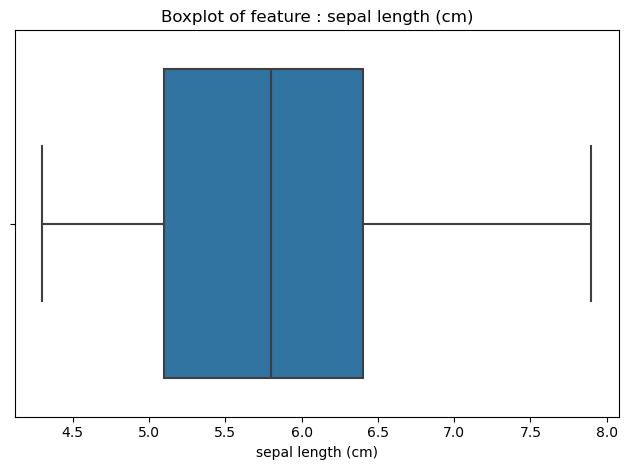

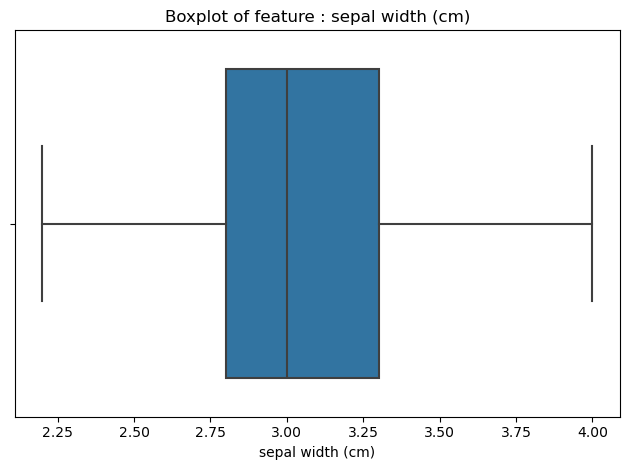

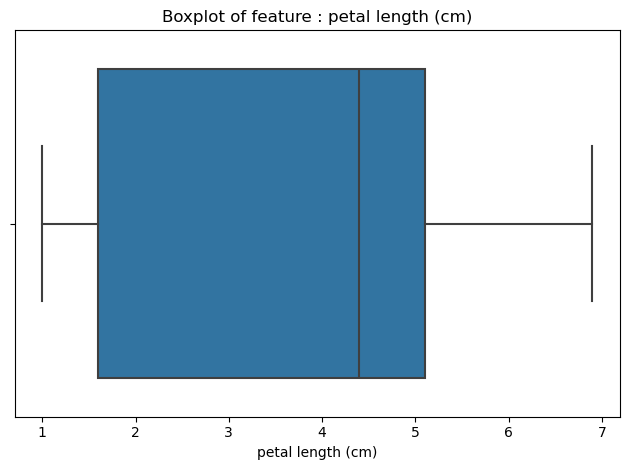

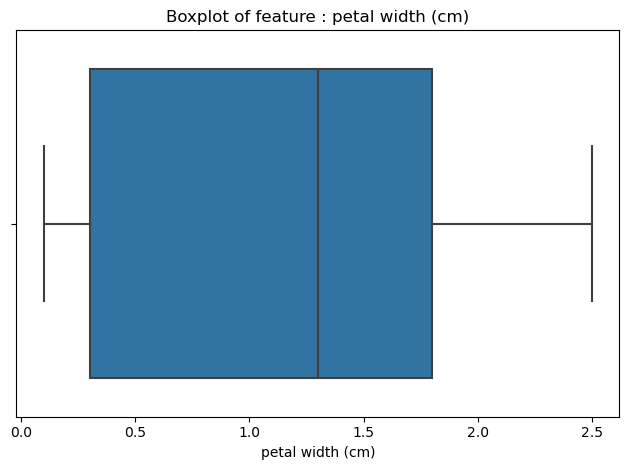

In [28]:
# Outlier detection using boxplot after outlier trim and dropping duplicates
for column in tdf.select_dtypes(include="number").columns:
    if column == "loan_status":
        continue
    sns.boxplot(data=tdf, x=column)
    plt.title(f"Boxplot of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

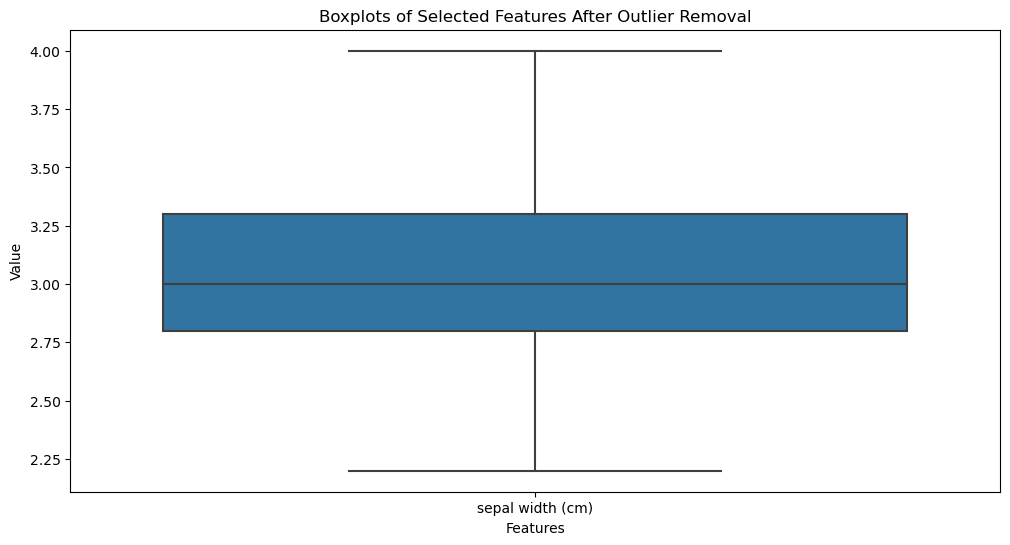

In [29]:
# Plot boxplots for the cleaned features
columns_to_check = ['sepal width (cm)']

plt.figure(figsize=(12, 6))
sns.boxplot(data=tdf[columns_to_check])
plt.title('Boxplots of Selected Features After Outlier Removal')
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

Outliers are removed from the columns

In [30]:
tdf.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,145.000000,145.000000,145.000000,145.000000
mean,5.857241,3.042759,3.797931,1.215862
std,0.836971,0.398216,1.760819,0.759905
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [31]:
tdf.shape

(145, 4)

## Step 7: Encoding Categorical Data

In [32]:
tdf.reset_index(drop=True, inplace=True) # reset df index

In [33]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  145 non-null    float64
 1   sepal width (cm)   145 non-null    float64
 2   petal length (cm)  145 non-null    float64
 3   petal width (cm)   145 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


There is no need encoding as there is no categorical data in this dataset

## Feature Scaling & Selection

In unsupervised learning, feature scaling is essential as it standardizes data, allowing algorithms to treat each feature with equal importance. Many clustering algorithms, such as KMeans, are distance-based, meaning features with larger scales can dominate distance calculations and skew results. Techniques like normalization (scaling features to a 0–1 range) or standardization (scaling to a mean of 0 and standard deviation of 1) help prevent this. Feature selection is equally important, as irrelevant or redundant features can introduce noise, reduce clustering accuracy, and increase computation time. By choosing only the most informative features, we enhance the algorithm's ability to identify natural patterns and groupings within the data.



In [39]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)  # Scaling all features except target

In unsupervised machine learning, feature selection methods help identify the most relevant features without using labeled data. Here are several common approaches:

1.Variance Thresholding: Features with low variance may contain little information and can be removed. For instance, a threshold can be set to retain only those features with variance above a certain level, ensuring features contribute useful distinctions in clustering.

2.Correlation Analysis: Highly correlated features often carry redundant information. By calculating correlations between features, one can identify and remove redundant features, helping the model focus on unique information.

3.Principal Component Analysis (PCA): PCA is a dimensionality reduction technique that transforms features into a set of orthogonal components based on variance. The top principal components represent most of the variance in the data, allowing effective feature reduction while retaining structure.

4.Autoencoders: An autoencoder is a neural network that learns a compressed representation of the data in an unsupervised manner. By training an autoencoder, one can use its hidden layers as lower-dimensional features, focusing on the most important data patterns.

5.Clustering-based Methods: Techniques like feature agglomeration cluster features based on similarity, allowing the selection of representative features from each cluster. This reduces redundancy by grouping similar features together and selecting a subset.


### Variance Thresholding

In [34]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Apply Variance Threshold
selector = VarianceThreshold(threshold=0.2)  # Set threshold to a value
X_selected = selector.fit_transform(X)

# Print selected features
print("Selected features based on variance thresholding:")
print(X_selected)

Selected features based on variance thresholding:
[[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]
 [4.6 1.5 0.2]
 [5.  1.4 0.2]
 [5.4 1.7 0.4]
 [4.6 1.4 0.3]
 [5.  1.5 0.2]
 [4.4 1.4 0.2]
 [4.9 1.5 0.1]
 [5.4 1.5 0.2]
 [4.8 1.6 0.2]
 [4.8 1.4 0.1]
 [4.3 1.1 0.1]
 [5.8 1.2 0.2]
 [5.7 1.5 0.4]
 [5.4 1.3 0.4]
 [5.1 1.4 0.3]
 [5.7 1.7 0.3]
 [5.1 1.5 0.3]
 [5.4 1.7 0.2]
 [5.1 1.5 0.4]
 [4.6 1.  0.2]
 [5.1 1.7 0.5]
 [4.8 1.9 0.2]
 [5.  1.6 0.2]
 [5.  1.6 0.4]
 [5.2 1.5 0.2]
 [5.2 1.4 0.2]
 [4.7 1.6 0.2]
 [4.8 1.6 0.2]
 [5.4 1.5 0.4]
 [5.2 1.5 0.1]
 [5.5 1.4 0.2]
 [4.9 1.5 0.2]
 [5.  1.2 0.2]
 [5.5 1.3 0.2]
 [4.9 1.4 0.1]
 [4.4 1.3 0.2]
 [5.1 1.5 0.2]
 [5.  1.3 0.3]
 [4.5 1.3 0.3]
 [4.4 1.3 0.2]
 [5.  1.6 0.6]
 [5.1 1.9 0.4]
 [4.8 1.4 0.3]
 [5.1 1.6 0.2]
 [4.6 1.4 0.2]
 [5.3 1.5 0.2]
 [5.  1.4 0.2]
 [7.  4.7 1.4]
 [6.4 4.5 1.5]
 [6.9 4.9 1.5]
 [5.5 4.  1.3]
 [6.5 4.6 1.5]
 [5.7 4.5 1.3]
 [6.3 4.7 1.6]
 [4.9 3.3 1. ]
 [6.6 4.6 1.3]
 [5.2 3.9 1.4]
 [5.  3.5 1. ]
 [5.9 4.2 1.5]
 [6.  4.  1. ]
 [6.1

In [37]:
#Variance Thresholding

from sklearn.feature_selection import VarianceThreshold

# Apply Variance Threshold (e.g., remove features with variance below 0.2)
selector = VarianceThreshold(threshold=0.2)
iris_selectedThreshold = selector.fit_transform(iris.data)

# Display the selected features
print("Selected Features based on variance thresholding:")
print(iris_selectedThreshold)

Selected Features based on variance thresholding:
[[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]
 [4.6 1.5 0.2]
 [5.  1.4 0.2]
 [5.4 1.7 0.4]
 [4.6 1.4 0.3]
 [5.  1.5 0.2]
 [4.4 1.4 0.2]
 [4.9 1.5 0.1]
 [5.4 1.5 0.2]
 [4.8 1.6 0.2]
 [4.8 1.4 0.1]
 [4.3 1.1 0.1]
 [5.8 1.2 0.2]
 [5.7 1.5 0.4]
 [5.4 1.3 0.4]
 [5.1 1.4 0.3]
 [5.7 1.7 0.3]
 [5.1 1.5 0.3]
 [5.4 1.7 0.2]
 [5.1 1.5 0.4]
 [4.6 1.  0.2]
 [5.1 1.7 0.5]
 [4.8 1.9 0.2]
 [5.  1.6 0.2]
 [5.  1.6 0.4]
 [5.2 1.5 0.2]
 [5.2 1.4 0.2]
 [4.7 1.6 0.2]
 [4.8 1.6 0.2]
 [5.4 1.5 0.4]
 [5.2 1.5 0.1]
 [5.5 1.4 0.2]
 [4.9 1.5 0.2]
 [5.  1.2 0.2]
 [5.5 1.3 0.2]
 [4.9 1.4 0.1]
 [4.4 1.3 0.2]
 [5.1 1.5 0.2]
 [5.  1.3 0.3]
 [4.5 1.3 0.3]
 [4.4 1.3 0.2]
 [5.  1.6 0.6]
 [5.1 1.9 0.4]
 [4.8 1.4 0.3]
 [5.1 1.6 0.2]
 [4.6 1.4 0.2]
 [5.3 1.5 0.2]
 [5.  1.4 0.2]
 [7.  4.7 1.4]
 [6.4 4.5 1.5]
 [6.9 4.9 1.5]
 [5.5 4.  1.3]
 [6.5 4.6 1.5]
 [5.7 4.5 1.3]
 [6.3 4.7 1.6]
 [4.9 3.3 1. ]
 [6.6 4.6 1.3]
 [5.2 3.9 1.4]
 [5.  3.5 1. ]
 [5.9 4.2 1.5]
 [6.  4.  1. ]
 [6.1

### Principal Component Analysis (PCA)

PCA is a widely used technique for unsupervised feature selection. It transforms the dataset into a lower-dimensional space by capturing the directions (principal components) with the most variance.

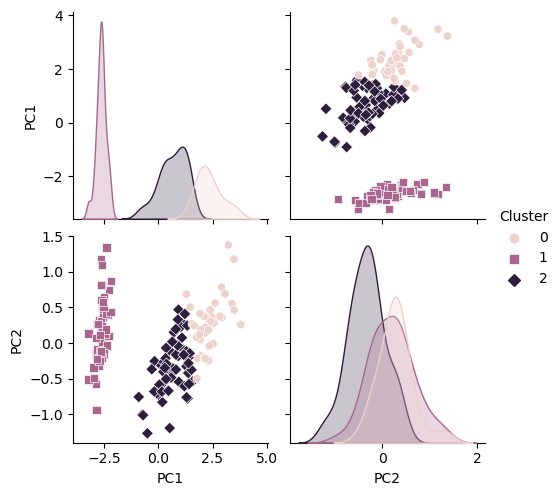

In [35]:
import seaborn as sns
import pandas as pd

# Create DataFrame with PCA components and clusters
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Create pairplot using Seaborn
sns.pairplot(pca_df, hue='Cluster', markers=["o", "s", "D"])
plt.show()


Selected Features using PCA (2 components):
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.866241

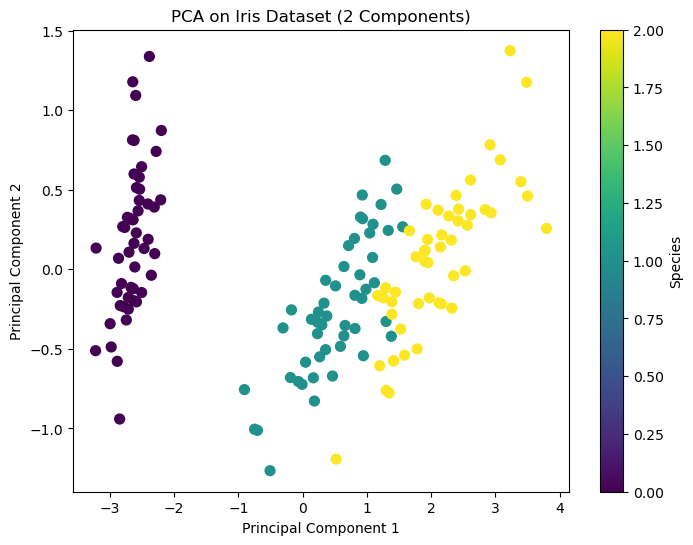

Explained Variance Ratio of Each Principal Component:
[0.92461872 0.05306648]


In [41]:
# Principal Component Analysis (PCA)
#PCA reduces the dataset into fewer dimensions by selecting components that capture the most variance.

# Apply PCA to reduce the dataset to 2 principal components

# Apply PCA to reduce to 2 principal components
pca = PCA(n_components=2)
Iris_Selected_pca  = pca.fit_transform(iris.data)

# Display the PCA-reduced features
print("Selected Features using PCA (2 components):")
print(Iris_Selected_pca)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Add the original target labels for visualization purposes
df_pca['species'] = iris.target

# Plot the data in the PCA space (2 components)
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['species'], cmap='viridis', s=50)
plt.title('PCA on Iris Dataset (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Species')
plt.show()

# Explained variance ratio
print("Explained Variance Ratio of Each Principal Component:")
print(pca.explained_variance_ratio_)

Explanation of the Code: Fit PCA: The PCA(n_components=2) reduces the Iris dataset to 2 principal components. These two components capture the majority of the variance in the dataset. Transform the Data: The original data is projected onto these two components, reducing it from four dimensions (features) to two. Plot the PCA Result: The 2D scatter plot shows the distribution of the data in the new PCA space. You can visually inspect how well-separated the clusters are in this reduced space. Explained Variance: The explained_variance_ratio_ shows how much variance each principal component captures. For example, PC1 might capture 70% of the variance, and PC2 might capture 20%.

## Clustering Algorithm Implementation

### A) KMeans Clustering
KMeans clustering is an algorithm that divides data into K clusters, each represented by the centroid.Each point is assigned to the nearest centroid, minimizing the squared distance from points to their centroid.Suitable for Iris dataset because it’s known to have separable clusters based on distances between features.

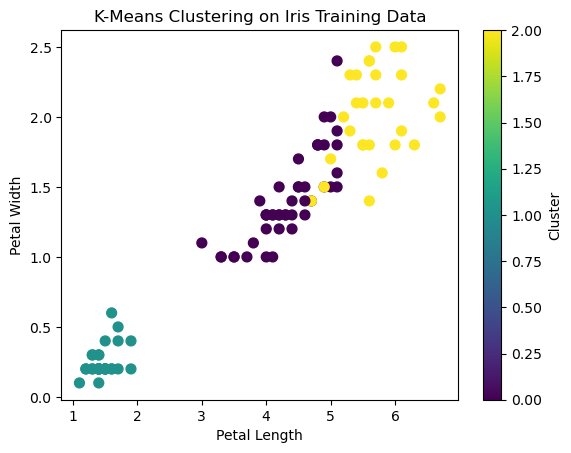

Cluster Centers:
[[5.79555556 2.69555556 4.34444444 1.41777778]
 [4.96451613 3.37741935 1.46451613 0.2483871 ]
 [6.85517241 3.10344828 5.70689655 2.02068966]]


In [42]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (unsupervised, so we use only X)
X_train, X_test = train_test_split(iris.data, test_size=0.3, random_state=42)

# Create the K-Means model (we assume 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the K-Means model to the training data
kmeans.fit(X_train)

# Predict the clusters for both training and test sets
train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)

# Visualizing the clusters (e.g., using Petal Length and Petal Width from the training set)
plt.scatter(X_train[:, 2], X_train[:, 3], c=train_clusters, cmap='viridis', s=50)
plt.title('K-Means Clustering on Iris Training Data')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.colorbar(label='Cluster')
plt.show()

# Check the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)


DBSCAN Clustering on Training Data

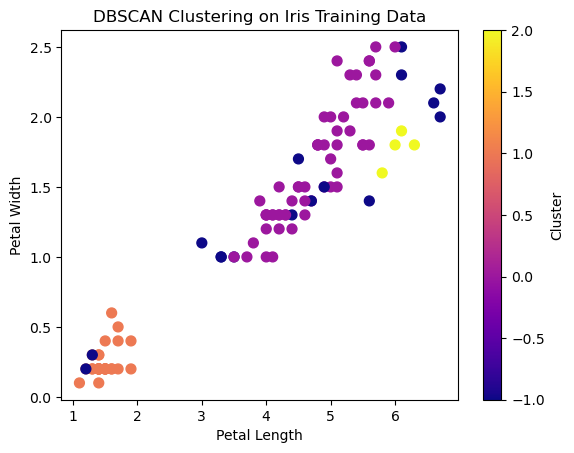

In [43]:
from sklearn.cluster import DBSCAN

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features

# Split the data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

# Create the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to the training data and predict clusters for the training data
train_clusters = dbscan.fit_predict(X_train)

# Visualize the clusters (using two features from the training set, e.g., Petal Length and Petal Width)
plt.scatter(X_train[:, 2], X_train[:, 3], c=train_clusters, cmap='plasma', s=50)
plt.title('DBSCAN Clustering on Iris Training Data')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.colorbar(label='Cluster')
plt.show()


We are using dbscan.fit_predict(X_train) to both fit the DBSCAN model and predict the cluster labels for the training data (X_train). This returns an array of cluster labels (train_clusters), where each sample is assigned a cluster number or -1 (if it is considered noise/outlier). Matching Shapes:

The number of rows in X_train[:, 2] and X_train[:, 3] (the Petal Length and Petal Width) matches the length of train_clusters, ensuring no mismatch. Plotting:

We use train_clusters to color the points in the scatter plot. Each unique cluster will have a different color. Points marked as noise (-1) will also be displayed in a unique color.

Hierarchical (Agglomerative) Clustering on Training Data

Agglomerative Clustering is a bottom-up approach that merges clusters iteratively until a specified number of clusters is reached. Summary of Steps: Split the Data: Split the dataset into training and testing sets using only the features (X), since unsupervised algorithms do not use target labels. Fit the Model: Train the unsupervised model (e.g., K-Means, DBSCAN, Agglomerative Clustering) on the training data. Predict Clusters: Predict the clusters for the training and test data. Visualize: Use plots (like scatter plots) to visualize the clusters.




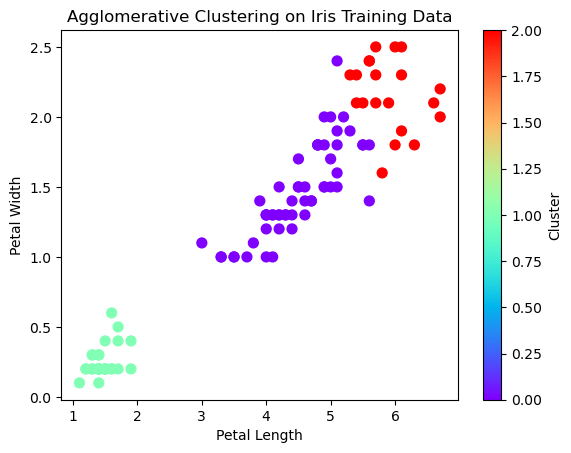

In [44]:

from sklearn.cluster import AgglomerativeClustering

# Create the Agglomerative Clustering model
agglo = AgglomerativeClustering(n_clusters=3)

# Fit the model to the training data
train_clusters = agglo.fit_predict(X_train)

# Visualize the clusters (using two features from the training set)
plt.scatter(X_train[:, 2], X_train[:, 3], c=train_clusters, cmap='rainbow', s=50)
plt.title('Agglomerative Clustering on Iris Training Data')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.colorbar(label='Cluster')
plt.show()